In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader.data as web
from datetime import datetime
import yfinance as yf

c:\Users\bhuyl\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)


In [3]:
data = yf.download('GOOG', start=start, end=end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,27.958241,27.968212,27.211790,27.620667,27.620667,28700582
2014-06-03,27.474070,27.541386,27.053225,27.172398,27.172398,37332215
2014-06-04,27.000870,27.355396,26.863747,27.158438,27.158438,36329469
2014-06-05,27.245197,27.671528,27.147964,27.619171,27.619171,33782496
2014-06-06,27.826603,27.826603,27.371351,27.740339,27.740339,34735104


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28078300


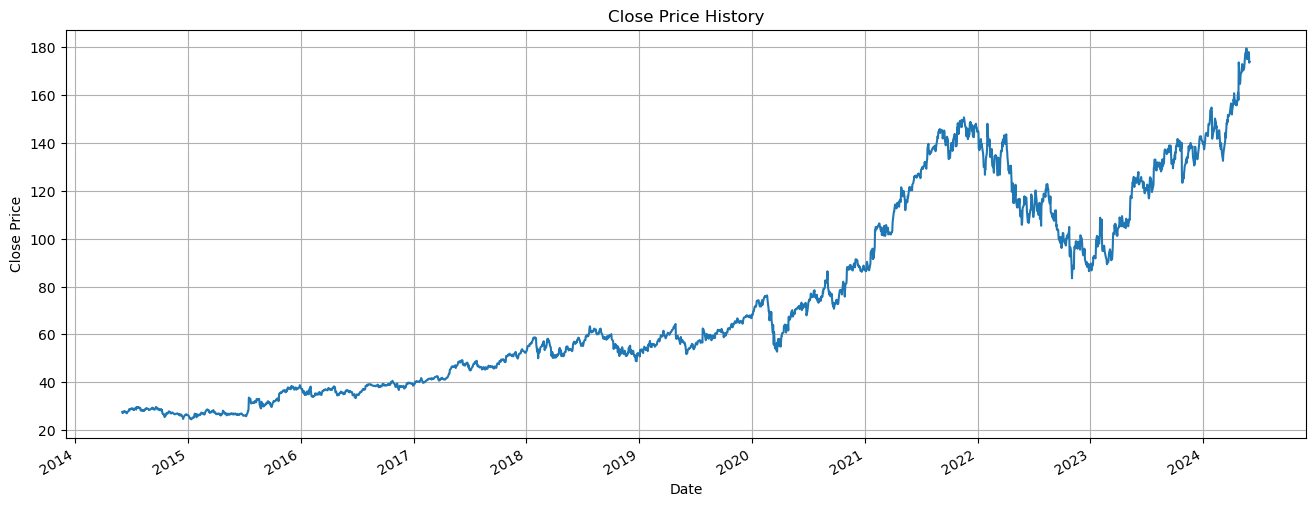

In [5]:
data['Close'].plot(figsize=(16,6))
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

In [6]:
ma100 = data.Close.rolling(100).mean()
ma100

Date
2014-06-02           NaN
2014-06-03           NaN
2014-06-04           NaN
2014-06-05           NaN
2014-06-06           NaN
                 ...    
2024-05-24    152.731299
2024-05-28    153.107899
2024-05-29    153.501499
2024-05-30    153.863199
2024-05-31    154.197500
Name: Close, Length: 2518, dtype: float64

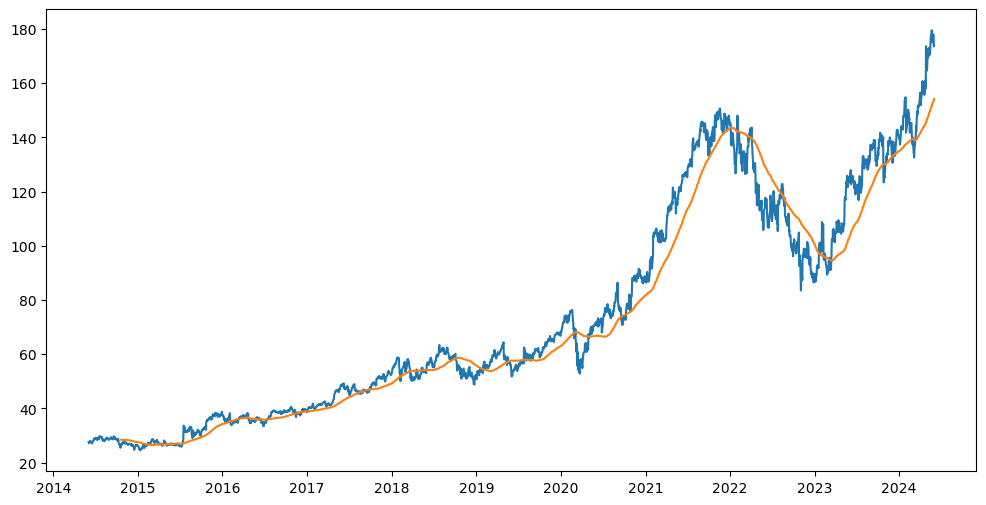

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100)

In [8]:
ma200 = data.Close.rolling(200).mean()
ma200

Date
2014-06-02          NaN
2014-06-03          NaN
2014-06-04          NaN
2014-06-05          NaN
2014-06-06          NaN
                ...    
2024-05-24    143.84730
2024-05-28    144.08635
2024-05-29    144.32250
2024-05-30    144.53115
2024-05-31    144.74960
Name: Close, Length: 2518, dtype: float64

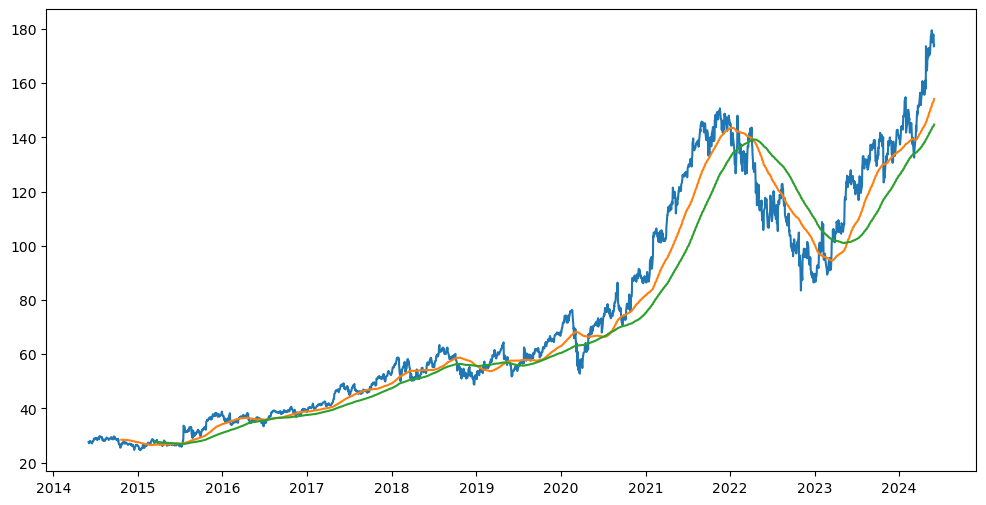

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100)
plt.plot(ma200)

In [10]:
data.shape

(2518, 6)

In [16]:
Data = data.filter(['Close'])

In [17]:
# Splitting Data into Training and Testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Data = scaler.fit_transform(Data)

In [18]:
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)

In [19]:
X_train, X_test, X_val, y_train, y_test, y_val = create_data(Data, n_future=1, n_past=60, train_test_split_percentage=0.8,
                                               validation_split_percentage = 0)

In [20]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(1966, 60, 1)
(492, 60, 1)
(1966, 1)
(492, 1)


In [21]:
import tensorflow

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


In [22]:
model = Sequential()
model.add(LSTM(units=60, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=30))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

c:\Users\bhuyl\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0593
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0010
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 8.5187e-04
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.3397e-04
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.0234e-04
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 7.4539e-04
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.5434e-04
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.4968e-04
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 6.1855e-04
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 6.1397e-04
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 6.5292e-04
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 5.5373e-04
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.6533e-04
Epoch 15/100

In [24]:
model.save('latest_model.keras')

In [25]:
# Making prediction

y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [26]:
y_pred.shape

(492, 1)

In [27]:
y_pred

array([[0.54485023],
       [0.54175246],
       [0.5420428 ],
       [0.553097  ],
       [0.5647049 ],
       [0.57366335],
       [0.5914408 ],
       [0.6019827 ],
       [0.5967095 ],
       [0.58594584],
       [0.5702275 ],
       [0.55740154],
       [0.5615663 ],
       [0.574822  ],
       [0.5963625 ],
       [0.6150691 ],
       [0.6175176 ],
       [0.6086252 ],
       [0.59216535],
       [0.5766906 ],
       [0.5703335 ],
       [0.56390595],
       [0.5704961 ],
       [0.5804169 ],
       [0.5887701 ],
       [0.5782211 ],
       [0.5627993 ],
       [0.5442921 ],
       [0.54976624],
       [0.5662888 ],
       [0.58613044],
       [0.5972126 ],
       [0.6014076 ],
       [0.60756814],
       [0.6125992 ],
       [0.6140691 ],
       [0.6134795 ],
       [0.61094904],
       [0.61561143],
       [0.61987454],
       [0.6287062 ],
       [0.6366699 ],
       [0.6405854 ],
       [0.6367178 ],
       [0.632202  ],
       [0.62316275],
       [0.60882926],
       [0.596

In [28]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

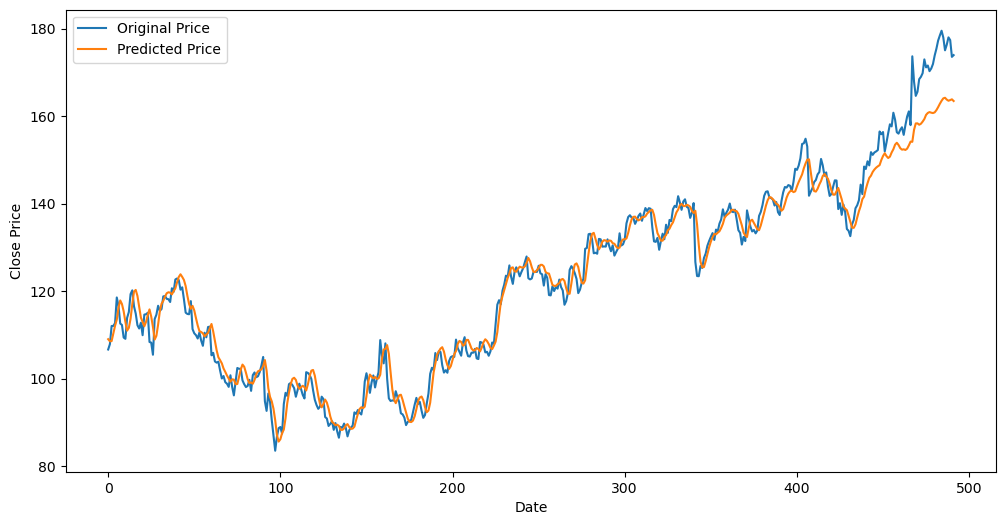

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()